In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print("Number of rows:", len(data))

Number of rows: 2938


In [5]:
# Display summary statistics
print(data.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

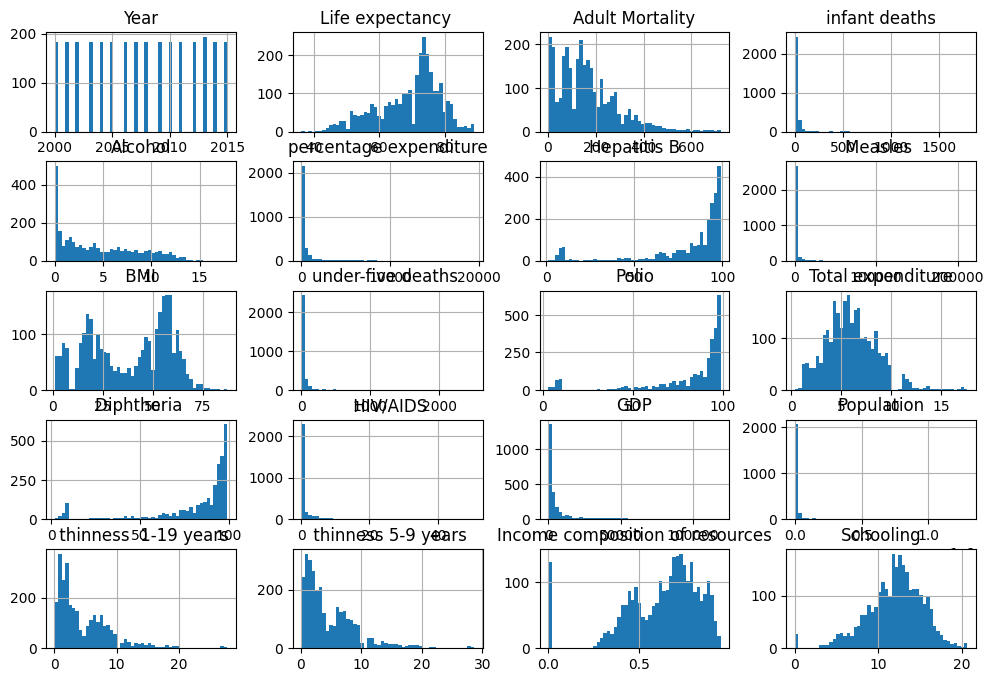

In [6]:
data.hist(bins=50, figsize=(12,8))
plt.show()

In [7]:
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
data.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


#Simple Linear Regression

In [10]:
# Select features and target
X = data[['GDP']]  # Independent variable (feature)
y = data['Life expectancy '] # Dependent variable (target)

In [11]:
# Calculate the number of unique values
nunique_life_expectancy = data['Life expectancy '].nunique()
nunique_gdp = data['GDP'].nunique()

print(f"\nNumber of unique values in 'Life expectancy ' column: {nunique_life_expectancy}")
print(f"\nNumber of unique values in 'GDP' column: {nunique_gdp}")


Number of unique values in 'Life expectancy ' column: 362

Number of unique values in 'GDP' column: 2490


In [17]:
# Function to print skewness and basic statistics for columns with missing values
def summarize_missing_columns(df):
    columns_with_missing = df.columns[df.isnull().sum() > 0]
    print("Summary of Columns with Missing Values:")
    for col in columns_with_missing:
        print(f"\nColumn: {col}")
        print(f"Skewness: {data[col].skew():.2f}")
        print(df[col].describe())

# Call the function to summarize columns with missing values
summarize_missing_columns(data)

# Imputation based on numerical insights
for col in data.select_dtypes(include=[np.number]).columns:
    if data[col].isnull().sum() > 0:
        if data[col].skew() < 1:  # Low skewness, use mean
            data[col].fillna(data[col].mean(), inplace=True)
        else:  # High skewness, use median
            data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_columns = data.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Confirm missing values are handled
print("\nRemaining Missing Values:")
print(data.isnull().sum())

Summary of Columns with Missing Values:

Remaining Missing Values:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [29]:
import scipy.stats as stats

# Strip column names to remove any leading or trailing spaces
data.columns = data.columns.str.strip()

# Check if 'Country' exists in the dataset
if 'Country' in data.columns and 'Life expectancy' in data.columns:
    # Group data by countries and exclude countries with insufficient data
    valid_countries = [
        country for country in data['Country'].unique()
        if len(data.loc[data['Country'] == country, 'Life expectancy'].dropna()) > 1
    ]

    # Group Life Expectancy by valid countries
    country_groups = [
        data.loc[data['Country'] == country, 'Life expectancy'].dropna()
        for country in valid_countries
    ]

    # Perform one-way ANOVA if there are enough groups
    if len(country_groups) > 1:
        f_stat, p_value = stats.f_oneway(*country_groups)
        print("ANOVA Test for All Countries:")
        print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.5f}")

        # Interpretation:
        if p_value < 0.05:
            print("There is a statistically significant difference in 'Life expectancy' across all countries.")
        else:
            print("No statistically significant difference in 'Life expectancy' across all countries.")
    else:
        print("Insufficient valid groups for ANOVA.")
else:
    print("The required columns 'Country' or 'Life expectancy' are missing from the dataset.")

ANOVA Test for All Countries:
F-statistic: 187.71, P-value: 0.00000
There is a statistically significant difference in 'Life expectancy' across all countries.


In [32]:
# Calculate the correlation between 'Life expectancy' and all other numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
correlation_with_life_expectancy = data[numerical_cols].corr()['Life expectancy']

# Print the correlations
print("Correlation with Life Expectancy:\n", correlation_with_life_expectancy)

Correlation with Life Expectancy:
 Year                               0.169623
Life expectancy                    1.000000
Adult Mortality                   -0.696326
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
BMI                                0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
HIV/AIDS                          -0.556457
GDP                                0.430895
Population                        -0.028845
thinness  1-19 years              -0.467267
thinness 5-9 years                -0.461739
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy, dtype: float64


<ipython-input-35-d24ad874ce3d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



Simple Linear Regression Equation:
Life Expectancy = 44.22 + 2.08 * Schooling

Simple Linear Regression Results:
Mean Squared Error (MSE): 39.37
R-squared (R2): 0.55


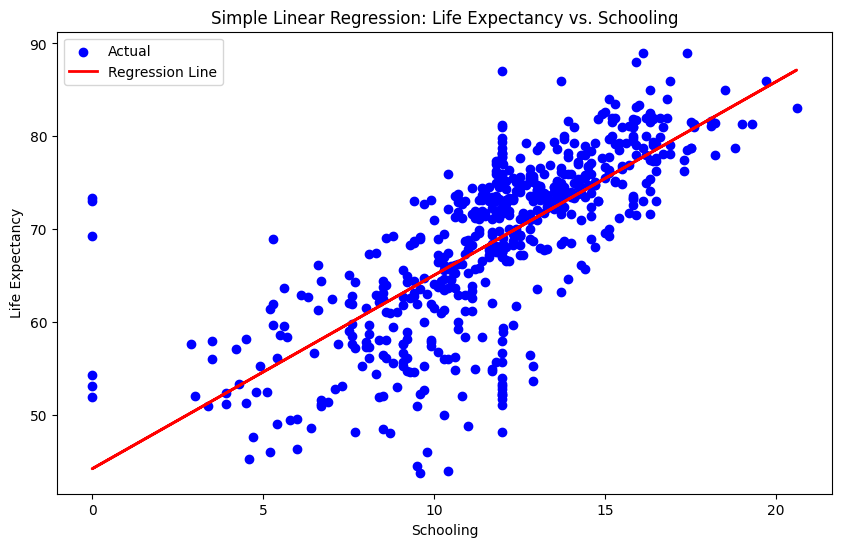

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Feature and target selection
X = data[['Schooling']]  # Independent variable
y = data['Life expectancy']  # Target variable

# Handle missing values (fill with mean, for example)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Print the model equation
print("\nSimple Linear Regression Equation:")
print(f"Life Expectancy = {intercept:.2f} + {coefficient:.2f} * Schooling")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("\nSimple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the regression line (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Simple Linear Regression: Life Expectancy vs. Schooling')
plt.legend()
plt.show()

#Multiple Linear Regression

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Select features (include numerical and categorical variables)
numerical_features = [
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Adult Mortality',
    'HIV/AIDS',
    'GDP'
]

# Create dummy variables for categorical columns (Country and Status)
categorical_features = ['Country', 'Status']
df = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Combine all features
X = data[numerical_features + [col for col in data.columns if 'Country_' in col or 'Status_' in col]]
y = data['Life expectancy']

# Handle missing values (fill with mean for simplicity)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the regression equation (partially for clarity)
print("\nMultiple Linear Regression Equation (First 10 Features):")
print(f"Life Expectancy = {intercept:.2f} ", end="")
for i, col in enumerate(X.columns[:10]):  # Displaying the first 10 features for brevity
    print(f"+ ({coefficients[i]:.2f} * {col})", end=" ")
print("\n... (equation truncated for brevity)")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nMultiple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Multiple Linear Regression Equation (First 10 Features):
Life Expectancy = 55.69 + (0.84 * Schooling) + (8.49 * Income composition of resources) + (0.06 * BMI) + (-0.02 * Adult Mortality) + (-0.47 * HIV/AIDS) + (0.00 * GDP) 
... (equation truncated for brevity)

Multiple Linear Regression Results:
Mean Squared Error (MSE): 18.97
R-squared (R2): 0.78


<ipython-input-37-db0b7d2f1173>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("Life Expectancy Data.csv")

# Create a DataFrame to display actual vs. predicted values
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the DataFrame
print("\nActual vs. Predicted Life Expectancy:")
print(actual_vs_predicted.head(20))


Actual vs. Predicted Life Expectancy:
      Actual  Predicted
2546    73.7  70.901092
650     75.9  75.559533
1740    74.2  74.522275
177     76.8  79.763743
1377    51.9  49.325659
535     49.6  53.591543
2371    67.4  68.593766
2014    73.9  69.856043
321     77.2  75.509690
2493    55.0  52.761188
495     51.4  52.880527
432     53.3  63.077730
1078    58.1  65.742145
1611    75.0  70.397818
2828    69.1  69.977113
1128    62.5  62.862959
1569    57.9  56.629349
1005    79.1  80.194600
785     72.0  68.977719
1924    78.8  81.588196
